For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

Dealing with the data
Show the dataframe shape.
Standardize header names.
Which columns are numerical?
Which columns are categorical?
Check and deal with NaN values.
Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
BONUS: Put all the previously mentioned data transformations into a function.

In [42]:
import pandas as pd
import numpy as np

In [43]:
data = pd.read_csv('C:/Users/mahna/Ironhack/Week1/Day2/Afternoon/lab4-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')

Show the dataframe shape.

In [44]:
data.shape

(10910, 26)

Standardize header names.

In [45]:
display(data.head(3))

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A


In [46]:
col_names= data.columns
col_names

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [47]:
data1= data.drop(['Unnamed: 0'],axis=1)

In [48]:
display(data1.head(3))

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A


In [49]:
data1 = data1.rename(columns={'EmploymentStatus':'Employment Status'})
data1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [50]:
data1.columns = data1.columns.str.lower()
data1.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


Which columns are numerical?

In [51]:
data1.select_dtypes('number').columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

Which columns are categorical?

In [52]:
data1.select_dtypes('object').columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employment status', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [53]:
data1.select_dtypes('number','object').columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

Check and deal with NaN values.

In [54]:
len(data1[data1[:].isna()==True])

10910

In [55]:
data1.isna().sum() 

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [56]:
round(data1.isna().sum()/len(data1),4)*100  #percent of missing values

customer                          0.00
state                             5.78
customer lifetime value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective to date                 0.00
employment status                 0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           5.80
months since policy inception     0.00
number of open complaints         5.80
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     5.70
vehicle size                      5.70
vehicle type                     50.25
dtype: float64

In [57]:
nulls_df = pd.DataFrame(round(data1.isna().sum()/len(data1),4)*100)

In [58]:
display(nulls_df)

,0
customer,0.00
state,5.78
customer lifetime value,0.00
response,5.78
coverage,0.00
education,0.00
effective to date,0.00
employment status,0.00
gender,0.00
income,0.00


In [59]:
data1.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [60]:
data1['effective to date'] = pd.to_datetime(data1['effective to date'], errors='coerce')
data1.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
BONUS: Put all the previously mentioned data transformations into a function.

In [61]:
data1['effective to date'][0].month

2

In [62]:
def convert_date_format(m):
    return m.strftime(format='%B')

In [63]:
data1['month']=data1['effective to date'].apply(convert_date_format)

In [64]:
display(data1.head(10))

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2011-02-14,Employed,M,50549,...,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,February
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN,February
7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,87197,...,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN,February
8,FM55990,California,5989.773931,Yes,Premium,College,2011-01-19,Employed,M,66839,...,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN,January
9,QX31376,Oregon,17114.328150,No,Extended,Master,2011-01-04,Employed,F,70961,...,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN,January


In [65]:
data1['quarter'] = data1['effective to date'].dt.quarter

In [66]:
display(data1.tail())

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,quarter
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February,1
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February,1
10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,2011-01-08,Unemployed,M,0,...,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN,January,1


In [67]:
data2=data1.copy()

# Lab5Round3

Show DataFrame info.

In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10279 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10279 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employment status              10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

Describe DataFrame.

In [69]:
data1.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,quarter
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000,10910.0
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.0
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556,0.0
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.0
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527,1.0
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.0
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,1.0
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.0


In [70]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
quarter,10910.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Show a plot of the total number of responses.

In [71]:
data1['response'].unique()

array(['No', 'Yes', nan], dtype=object)

In [72]:
data1['response'].value_counts()

No     8813
Yes    1466
Name: response, dtype: int64

In [73]:
len(data1[data1['response'].isna()==True])

631

The response "No" is very high compared to "Yes". Therefore, most common value could be used to replace the missing values. Moreover, more people prefer to say nothing instead of "No".

In [74]:
data1['response_modified']=data1['response'].fillna('No')

In [76]:
len(data1[data1['response_modified'].isna()==True])

0

In [77]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

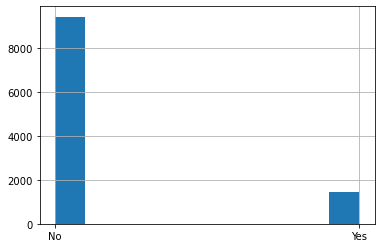

In [78]:
data1['response_modified'].hist()
plt.show()

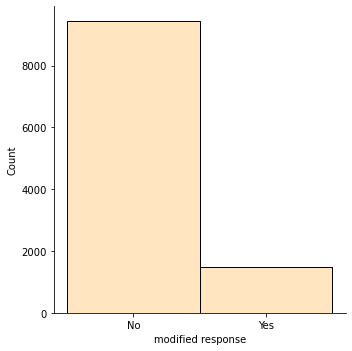

In [79]:
sns.displot(data1['response_modified'],color='NavajoWhite')
plt.xlabel("modified response")
plt.show()

Show a plot of the response rate by the sales channel.

In [82]:
sns.set_theme(style="whitegrid")

In [81]:
data1.columns.unique()

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employment status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type', 'month', 'quarter',
       'response_modified'],
      dtype='object')

In [83]:
display(data1)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,quarter,response_modified
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February,1,No
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January,1,No
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February,1,No
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,1,Yes
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January,1,No
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January,1,No
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February,1,No
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February,1,No


In [84]:
sales_response=data1[['sales channel','response_modified']]

In [85]:
display(sales_response)

,sales channel,response_modified
0,Agent,No
1,Call Center,No
2,Call Center,No
3,Branch,Yes
4,Branch,No
...,...,...
10905,Web,No
10906,Branch,No
10907,Web,No
10908,Branch,No


In [86]:
CrosstabResult=pd.crosstab(index=sales_response['response_modified'],columns=sales_response['sales channel'])
print(CrosstabResult)

sales channel      Agent  Branch  Call Center   Web
response_modified                                  
No                  3379    2696         1920  1449
Yes                  742     326          221   177


<AxesSubplot:xlabel='response_modified'>

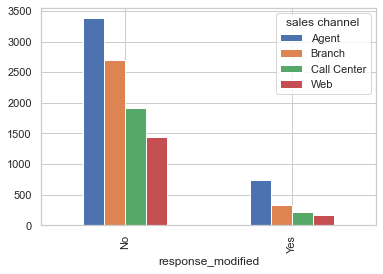

In [87]:
%matplotlib inline
CrosstabResult.plot.bar()

Show a plot of the response rate by the total claim amount.

In [88]:
data1.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,quarter,response_modified
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February,1,No
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January,1,No
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February,1,No
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,1,Yes
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January,1,No


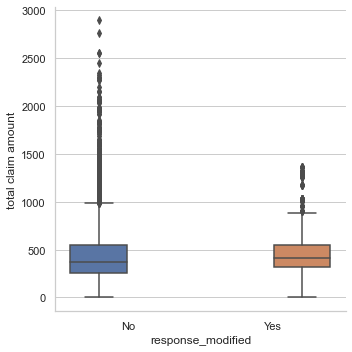

In [89]:
sns.catplot(x="response_modified", y="total claim amount", hue="response_modified", kind="box", data=data1)

Show a plot of the response rate by income.

In [90]:
income_response=data1[['income','response_modified']]

<AxesSubplot:title={'center':'income'}, xlabel='response_modified'>

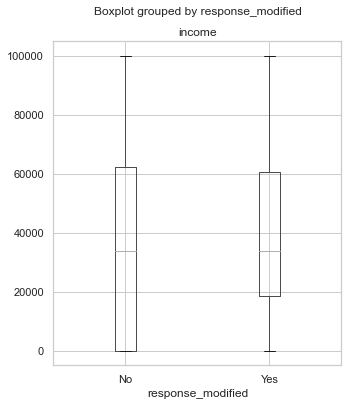

In [91]:
data1.boxplot(column='income', by='response_modified', figsize=(5,6))

# Lab6Round4

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [92]:
data1.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [93]:
data1.select_dtypes('number').columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'quarter'],
      dtype='object')

In [94]:
numerical=data1[['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'quarter']]

In [95]:
data1.select_dtypes('object').columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employment status', 'gender', 'location code', 'marital status',
       'policy type', 'policy', 'renew offer type', 'sales channel',
       'vehicle class', 'vehicle size', 'vehicle type', 'month',
       'response_modified'],
      dtype='object')

In [96]:
categorical=data1[['customer', 'state', 'response', 'coverage', 'education',
       'employment status', 'gender', 'location code', 'marital status',
       'policy type', 'policy', 'renew offer type', 'sales channel',
       'vehicle class', 'vehicle size', 'vehicle type', 'month',
       'response_modified']]

In [97]:
display(numerical)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,quarter
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,1
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,1
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,1
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,1


Now we will try to check the normality of the numerical variables visually
-Use seaborn library to construct distribution plots for the numerical variables
-Use Matplotlib to construct histograms
-Do the distributions for different numerical variables look like a normal distribution

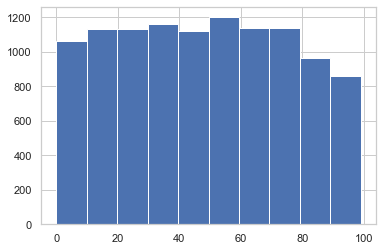

In [98]:
data1['months since policy inception'].hist()
plt.show()


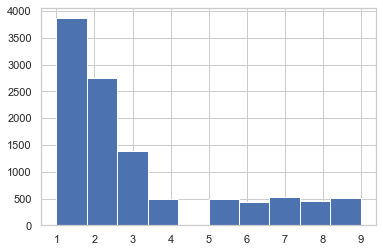

In [99]:
data1['number of policies'].hist()
plt.show()

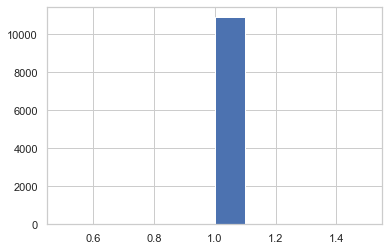

In [100]:
data1['quarter'].hist()
plt.show()

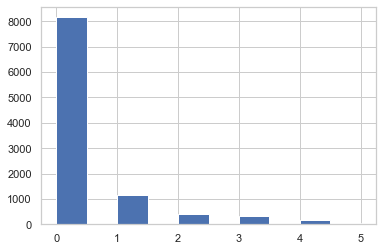

In [101]:
data1['number of open complaints'].hist()
plt.show()

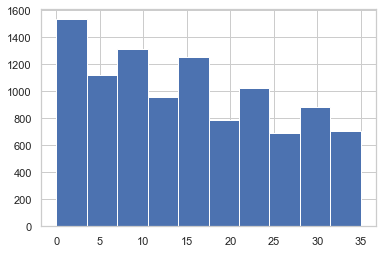

In [102]:
data1['months since last claim'].hist()
plt.show()

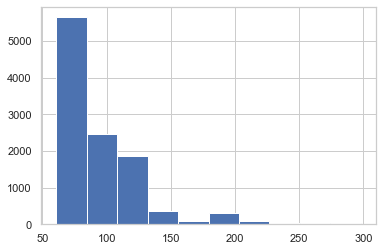

In [103]:
data1['monthly premium auto'].hist()
plt.show()


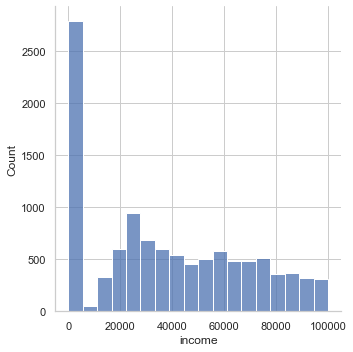

In [104]:
sns.displot(data1, x="income")

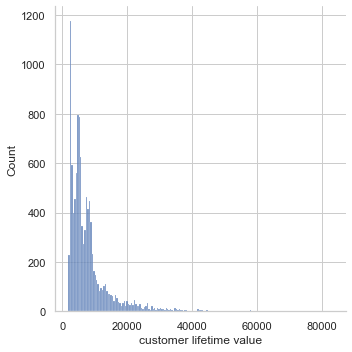

In [105]:
sns.displot(data1, x="customer lifetime value")

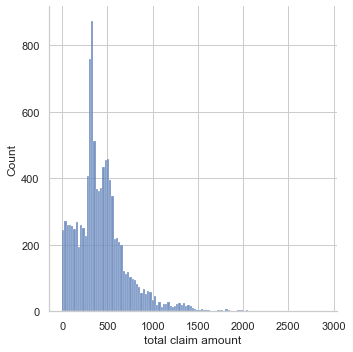

In [106]:
sns.displot(data1, x="total claim amount")

In [107]:
from scipy.stats import skew
print (skew(data1['income']))

0.285799791931561


In [108]:
print (skew(data1['total claim amount']))

1.7290480366753627


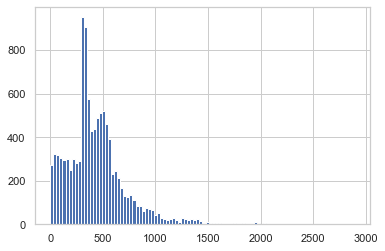

In [109]:
plt.hist(data1['total claim amount'], bins=100)
plt.show()


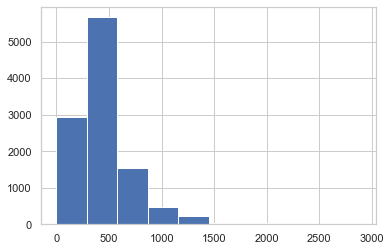

In [110]:
data1['total claim amount'].hist()
plt.show()

In [111]:
iqr = np.percentile(data1['income'],75) - np.percentile(data1['income'],25)
upper_limit = np.percentile(data1['income'],75) + 1.5*iqr
lower_limit = np.percentile(data1['income'],25) - 1.5*iqr
lower_limit

-93376.125

data2 = data1[(data1['income']>lower_limit) & (data1['income']<upper_limit)]

In [112]:
# display(data2)

~/Ironhack/Week1/Day2/Afternoon/lab4-customer-analysis-round-2

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

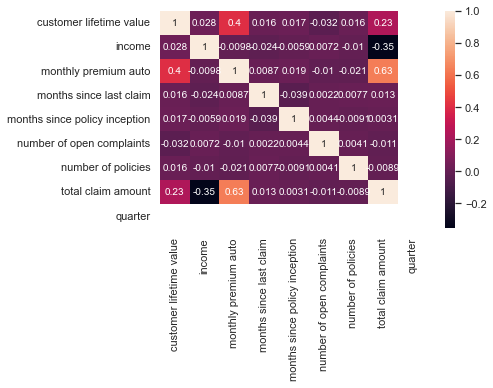

<Figure size 3600x3600 with 0 Axes>

In [113]:
correlations_matrix = data1.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.figure(figsize=(6, 6), dpi = 600)
plt.show()

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

There is no correlation more than 0.9. So we are not dropping any columns for the sake of machine learning.

# Lab7Round5

Processing Data
(Further processing...)

X-y split.
Normalize (numerical).

In [114]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [115]:
from sklearn.preprocessing import StandardScaler

In [117]:
num=data1[['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'quarter']]

<AxesSubplot:>

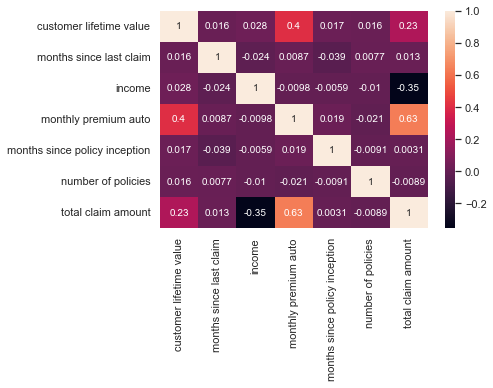

In [118]:
num_1 = num[['customer lifetime value','months since last claim', 'income', 'monthly premium auto', 'months since policy inception', 'number of policies', 'total claim amount']].copy()
                     
sns.heatmap(num_1.corr(), annot=True)

In [151]:
y = data1['total claim amount']
X_1 = num_1.drop(['total claim amount'], axis=1)

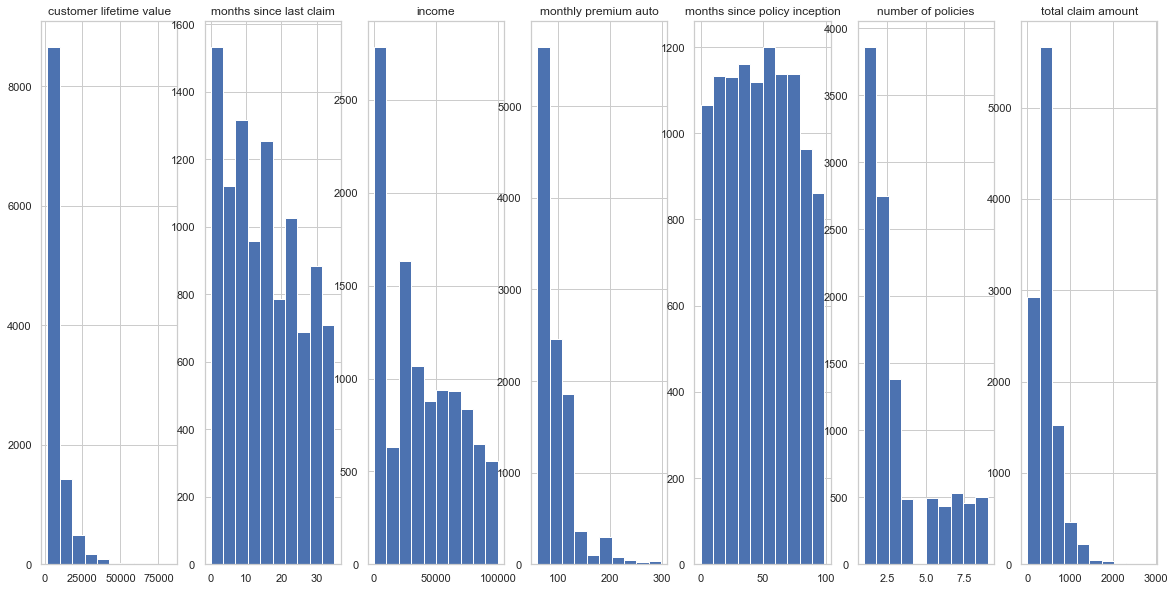

In [152]:
def hist_maker(df):
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(20,10))
    
    for col in cols:
        y = cols.index(col)
        ax[y].hist(data=df, x=col)
        ax[y].set_title(col)
        
    return

hist_maker(num_1)

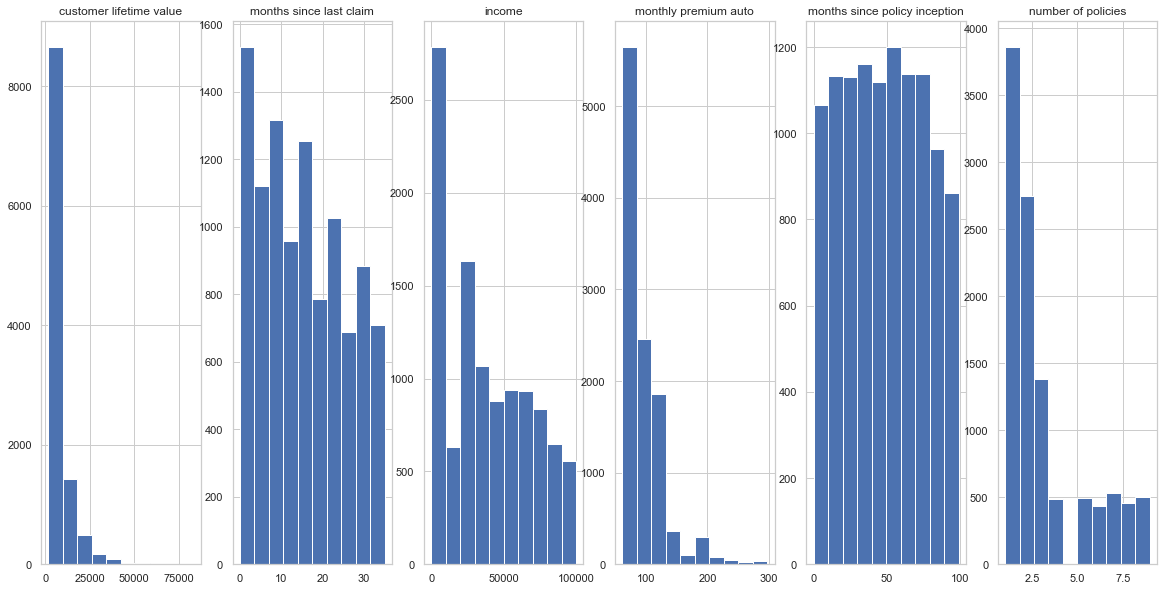

In [153]:
hist_maker(X_1)

In [154]:
transformer = MinMaxScaler().fit(X_1)
x_normalized = transformer.transform(X_1)
print(x_normalized.shape)
x_normalized=pd.DataFrame(x_normalized, columns=X_1.columns)
x_normalized.head()

(10910, 6)


,customer lifetime value,months since last claim,income,monthly premium auto,months since policy inception,number of policies
0,0.035752,0.200000,0.480381,0.000000,0.525253,1.000
1,0.004059,0.085714,0.000000,0.012658,0.262626,0.000
2,0.160264,0.971429,0.221432,0.164557,0.313131,0.125
3,0.250953,0.285714,0.490873,0.151899,0.030303,0.125
4,0.087527,NaN,0.236795,0.236287,0.313131,0.750


In [155]:
Standardtransformer = StandardScaler()
Standardtransformer.fit(X_1) # This will obtain the mean and the sd of each column
x_standardized = Standardtransformer.transform(X_1) # Applies the transformation
print("The numpy array looks like this: ",x_standardized)
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_standardized),x_standardized.shape))
x_standardized = pd.DataFrame(x_standardized,columns=X_1.columns)
x_standardized.head()

The numpy array looks like this:  [[-0.46610505 -0.80845092  0.34563485 -0.93481904  0.13987654  2.50945468]
 [-0.84094593 -1.20528189 -1.23646244 -0.84771343 -0.79070911 -0.82492205]
 [ 1.00652314  1.87015815 -0.50719362  0.19755381 -0.61175033 -0.40812496]
 ...
 [ 2.30582467 -0.41161995  0.07578661  3.13010912  0.53358586 -0.40812496]
 [ 0.5742732  -1.50290512  0.87815031  1.88159547 -0.75491735  1.25906341]
 [-0.16859268  1.57253492 -1.23646244  0.22658901 -1.685503    0.00867213]]
The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (10910, 6)


,customer lifetime value,months since last claim,income,monthly premium auto,months since policy inception,number of policies
0,-0.466105,-0.808451,0.345635,-0.934819,0.139877,2.509455
1,-0.840946,-1.205282,-1.236462,-0.847713,-0.790709,-0.824922
2,1.006523,1.870158,-0.507194,0.197554,-0.611750,-0.408125
3,2.079112,-0.510828,0.380189,0.110448,-1.613919,-0.408125
4,0.146240,NaN,-0.456597,0.691152,-0.611750,1.675860


# Lab8Round6

Processing Data
(Further processing...)

One Hot/Label Encoding (categorical).
Concat DataFrames

In [156]:
num = data1.select_dtypes(np.number)
num
num.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'quarter'],
      dtype='object')

In [157]:
X_num = data1.select_dtypes(include = np.number)
X_cat = data1[['gender']]

In [158]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(X_cat) # This determines how many unique values has each categorical column
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)

[array(['F', 'M'], dtype=object)]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [159]:
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded.head(20)

,F,M
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0
6,1.0,0.0
7,0.0,1.0
8,0.0,1.0
9,1.0,0.0


In [131]:
onehot_encoded = onehot_encoded.drop(['M'],axis=1)
onehot_encoded.head()

,F
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [132]:
X=pd.concat([x_normalized, onehot_encoded], axis=1)
X

,customer lifetime value,months since last claim,income,monthly premium auto,months since policy inception,number of policies,"(F,)"
0,0.035752,0.200000,0.480381,0.000000,0.525253,1.000,0.0
1,0.004059,0.085714,0.000000,0.012658,0.262626,0.000,1.0
2,0.160264,0.971429,0.221432,0.164557,0.313131,0.125,0.0
3,0.250953,0.285714,0.490873,0.151899,0.030303,0.125,0.0
4,0.087527,NaN,0.236795,0.236287,0.313131,0.750,1.0
...,...,...,...,...,...,...,...
10905,0.167823,NaN,0.000000,0.810127,0.404040,0.750,1.0
10906,0.041281,0.200000,0.611576,0.016878,0.686869,0.625,1.0
10907,0.270122,0.314286,0.398446,0.590717,0.636364,0.125,1.0
10908,0.123717,0.000000,0.642072,0.409283,0.272727,0.625,1.0


In [133]:
pd.concat([X_1,x_normalized,x_standardized],axis=1)

,customer lifetime value,months since last claim,income,monthly premium auto,months since policy inception,number of policies,customer lifetime value,months since last claim,income,monthly premium auto,months since policy inception,number of policies,customer lifetime value,months since last claim,income,monthly premium auto,months since policy inception,number of policies
0,4809.216960,7.0,48029,61,52,9,0.035752,0.200000,0.480381,0.000000,0.525253,1.000,-0.466105,-0.808451,0.345635,-0.934819,0.139877,2.509455
1,2228.525238,3.0,0,64,26,1,0.004059,0.085714,0.000000,0.012658,0.262626,0.000,-0.840946,-1.205282,-1.236462,-0.847713,-0.790709,-0.824922
2,14947.917300,34.0,22139,100,31,2,0.160264,0.971429,0.221432,0.164557,0.313131,0.125,1.006523,1.870158,-0.507194,0.197554,-0.611750,-0.408125
3,22332.439460,10.0,49078,97,3,2,0.250953,0.285714,0.490873,0.151899,0.030303,0.125,2.079112,-0.510828,0.380189,0.110448,-1.613919,-0.408125
4,9025.067525,NaN,23675,117,31,7,0.087527,NaN,0.236795,0.236287,0.313131,0.750,0.146240,NaN,-0.456597,0.691152,-0.611750,1.675860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,NaN,0,253,40,7,0.167823,NaN,0.000000,0.810127,0.404040,0.750,1.095916,NaN,-1.236462,4.639940,-0.289625,1.675860
10906,5259.444853,7.0,61146,65,68,6,0.041281,0.200000,0.611576,0.016878,0.686869,0.625,-0.400710,-0.808451,0.777715,-0.818678,0.712545,1.259063
10907,23893.304100,11.0,39837,201,63,2,0.270122,0.314286,0.398446,0.590717,0.636364,0.125,2.305825,-0.411620,0.075787,3.130109,0.533586,-0.408125
10908,11971.977650,0.0,64195,158,27,6,0.123717,0.000000,0.642072,0.409283,0.272727,0.625,0.574273,-1.502905,0.878150,1.881595,-0.754917,1.259063


#Linear Regression:
Train-test split.
Apply linear regression.

In [134]:
y = data1['total claim amount']
y.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: total claim amount, dtype: float64

In [135]:
X.head()

,customer lifetime value,months since last claim,income,monthly premium auto,months since policy inception,number of policies,"(F,)"
0,0.035752,0.200000,0.480381,0.000000,0.525253,1.000,0.0
1,0.004059,0.085714,0.000000,0.012658,0.262626,0.000,1.0
2,0.160264,0.971429,0.221432,0.164557,0.313131,0.125,0.0
3,0.250953,0.285714,0.490873,0.151899,0.030303,0.125,0.0
4,0.087527,NaN,0.236795,0.236287,0.313131,0.750,1.0


In [136]:
X_1=num[['income', 'monthly premium auto', 'months since policy inception', 'number of policies']].copy()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=22)

In [138]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 4)
(2182, 4)
(8728,)
(2182,)


In [139]:
X_train.head()

,income,monthly premium auto,months since policy inception,number of policies
2483,86347,130,93,2
3940,0,66,35,1
7049,0,66,89,3
2322,26032,109,25,3
6148,26514,91,58,3


In [140]:
y_train.head()

2483    593.779554
3940    316.800000
7049    712.309237
2322    638.098653
6148    655.200000
Name: total claim amount, dtype: float64

In [141]:
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [142]:
transformer = MinMaxScaler().fit(X_1)
x_normalized = transformer.transform(X_1)
print(x_normalized.shape)
x_normalized=pd.DataFrame(x_normalized, columns=X_1.columns)
x_normalized.head()

(10910, 4)


,income,monthly premium auto,months since policy inception,number of policies
0,0.480381,0.000000,0.525253,1.000
1,0.000000,0.012658,0.262626,0.000
2,0.221432,0.164557,0.313131,0.125
3,0.490873,0.151899,0.030303,0.125
4,0.236795,0.236287,0.313131,0.750


In [143]:
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

0.5133753864890265

#Model Validation:
Description:
R2.
MSE.
RMSE.
MAE.

In [144]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)


print("R2 score for training is:", r2_score(y_train, y_pred_train))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test, y_pred_test))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test))

R2 score for training is: 0.5133753864890265
MSE for training is: 41297.00197348907
RMSE for training is: 203.2166380331322
MAE for training is: 145.41350068784618
MAPE for training is: 2.2871790267545724
------------------------
R2 score por testing is: 0.5467357287060138
MSE for testing is: 39575.31877614678
RMSE for testing is: 198.93546384731602
MAE for testing is: 142.33050868404945
MAPE for testing is: 2.1015809618279673


This means that the model is not fitted properly and error is very high.

# Lab9Round7

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

use the concept of multicollinearity and remove insignificant variables
use a different method of scaling the numerical variables
use a different ratio of train test split
use the transformation on numerical columns which align it more towards a normal distribution

<AxesSubplot:>

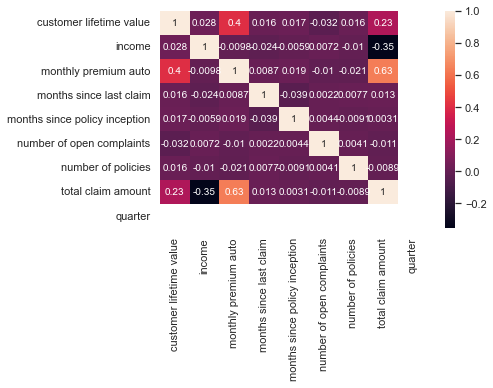

In [145]:
sns.heatmap(num.corr(), annot=True)

In [190]:
y = data1['total claim amount']
X_2=num[['monthly premium auto', 'months since policy inception', 'number of policies']].copy()

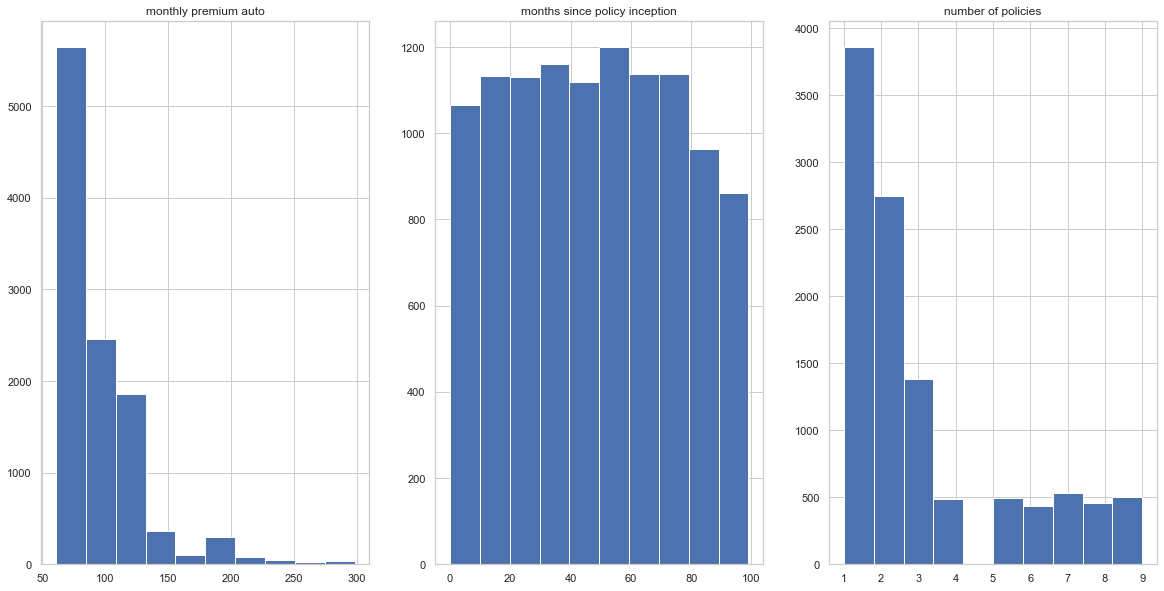

In [191]:
hist_maker(X_2)

In [192]:
transformer = MinMaxScaler().fit(X_2)
x_normalized = transformer.transform(X_2)
print(x_normalized.shape)
x_normalized=pd.DataFrame(x_normalized, columns=X_2.columns)
x_normalized.head()

(10910, 3)


,monthly premium auto,months since policy inception,number of policies
0,0.000000,0.525253,1.000
1,0.012658,0.262626,0.000
2,0.164557,0.313131,0.125
3,0.151899,0.030303,0.125
4,0.236287,0.313131,0.750


In [193]:
Standardtransformer = StandardScaler()
Standardtransformer.fit(X_2)
x_standardized = Standardtransformer.transform(X_2)
print("The numpy array looks like this: ",x_standardized)
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_standardized),x_standardized.shape))
x_standardized = pd.DataFrame(x_standardized,columns=X_2.columns)
x_standardized.head()

The numpy array looks like this:  [[-0.93481904  0.13987654  2.50945468]
 [-0.84771343 -0.79070911 -0.82492205]
 [ 0.19755381 -0.61175033 -0.40812496]
 ...
 [ 3.13010912  0.53358586 -0.40812496]
 [ 1.88159547 -0.75491735  1.25906341]
 [ 0.22658901 -1.685503    0.00867213]]
The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (10910, 3)


,monthly premium auto,months since policy inception,number of policies
0,-0.934819,0.139877,2.509455
1,-0.847713,-0.790709,-0.824922
2,0.197554,-0.611750,-0.408125
3,0.110448,-1.613919,-0.408125
4,0.691152,-0.611750,1.675860


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)

In [195]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 3)
(2182, 3)
(8728,)
(2182,)


In [196]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [197]:
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

0.405221086692653

In [199]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)


print("R2 score for training is:", r2_score(y_train, y_pred_train))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test, y_pred_test))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test))

R2 score for training is: 0.405221086692653
MSE for training is: 51457.97182594199
RMSE for training is: 226.84349632718587
MAE for training is: 151.88528047604737
MAPE for training is: 2.890618328514372
------------------------
R2 score por testing is: 0.3735688430315812
MSE for testing is: 50579.915187946186
RMSE for testing is: 224.89978921276514
MAE for testing is: 152.20060865037004
MAPE for testing is: 2.5414881453188967


In [ ]:
The outcome of the second model is not better. We need more significant correlations to have a better result.